# Logistic Regression with Pytorch

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='data/',download = True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x264A8F26668>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Lable:  5


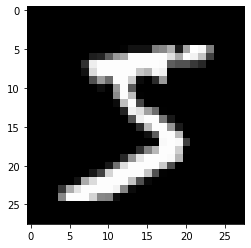

In [7]:
image,label = dataset[0]
plt.imshow(image, cmap = 'gray')
print("Lable: ",label)

Lable:  3


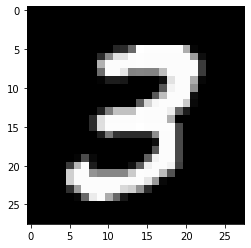

In [8]:
image,label = dataset[7]
plt.imshow(image, cmap = 'gray')
print("Lable: ",label)

In [9]:
import torchvision.transforms as transforms

In [10]:
dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())
len(dataset)

60000

In [11]:
img_tensor,label = dataset[0]
print(img_tensor.shape, " Lable: ", label)

torch.Size([1, 28, 28])  Lable:  5


tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824, 0.6275, 0.4235, 0.0039,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412, 0.9922, 0.9922, 0.4667,
          0.0980, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.1765, 0.7294, 0.9922, 0.9922,
          0.5882, 0.1059],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0627, 0.3647, 0.9882,
          0.9922, 0.7333],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9765,
          0.9922, 0.9765],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.1804, 0.5098, 0.7176, 0.9922,
          0.9922, 0.8118],
         [0.0000, 0.0000, 0.1529, 0.5804, 0.8980, 0.9922, 0.9922, 0.9922,
          0.9804,

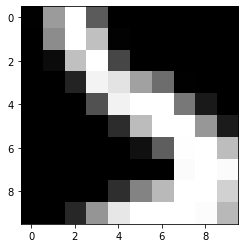

In [12]:
print(img_tensor[:,10:20,10:20])
plt.imshow(img_tensor[0,10:20,10:20], cmap = 'gray')

In [13]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [14]:
# matrix multiplication time complexity grows with n to the power 3 (i.e. n^3) thats why we are spliting the data in batches
from torch.utils.data import DataLoader

batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [15]:
import torch.nn as nn

In [16]:
input_size = 28*28
num_class = 10

In [17]:
model = nn.Linear(input_size, num_class)

In [18]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0001,  0.0256,  0.0267,  ...,  0.0178, -0.0111, -0.0135],
        [-0.0218, -0.0084, -0.0215,  ..., -0.0288, -0.0072,  0.0160],
        [-0.0116,  0.0182,  0.0286,  ...,  0.0336, -0.0271,  0.0128],
        ...,
        [-0.0083,  0.0206,  0.0113,  ..., -0.0023, -0.0233, -0.0162],
        [ 0.0081, -0.0246, -0.0131,  ..., -0.0167,  0.0141, -0.0029],
        [-0.0181,  0.0147, -0.0315,  ...,  0.0194, -0.0075, -0.0148]],
       requires_grad=True)

In [19]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0041, -0.0326, -0.0325,  0.0188,  0.0054,  0.0141,  0.0180,  0.0276,
         0.0152,  0.0136], requires_grad=True)

In [20]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    output = model(images)
    break

tensor([4, 0, 6, 4, 4, 8, 5, 7, 8, 7, 6, 1, 1, 2, 9, 0, 2, 3, 8, 8, 9, 8, 0, 1,
        3, 2, 9, 1, 4, 0, 9, 7, 2, 8, 8, 6, 4, 1, 5, 0, 9, 8, 5, 6, 4, 4, 0, 6,
        6, 7, 1, 8, 9, 5, 1, 9, 3, 5, 0, 5, 8, 9, 3, 8, 8, 9, 9, 9, 9, 4, 8, 3,
        2, 6, 2, 6, 5, 4, 7, 3, 3, 2, 0, 0, 9, 6, 6, 4, 0, 1, 8, 2, 8, 0, 1, 6,
        6, 2, 3, 4, 3, 2, 3, 6, 1, 9, 3, 1, 8, 3, 3, 8, 7, 1, 2, 6, 4, 2, 0, 7,
        7, 3, 9, 3, 6, 5, 6, 1])
torch.Size([128, 1, 28, 28])


RuntimeError: size mismatch, m1: [3584 x 28], m2: [784 x 10] at C:\w\b\windows\pytorch\aten\src\TH/generic/THTensorMath.cpp:41

### ERROR

This leads to an error, because our input data does not have the right shape. Our images are of the shape 1x28x28, but we need them to be vectors of size 784 i.e. we need to flatten them out. We'll use the `.reshape` method of a tensor, which will allow us to efficiently 'view' each image as a flat vector, without really chaging the underlying data.

To include this additional functionality within our model, we need to define a custom model, by extending the `nn.Module` class from PyTorch.

In [21]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_class)
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
model = MnistModel()        

In [22]:
model.linear.weight.shape

torch.Size([10, 784])

In [23]:
model.linear.bias.shape

torch.Size([10])

In [24]:
# thats why directly use 1 attribute to display weights and bias
list(model.parameters())

[Parameter containing:
 tensor([[-0.0218, -0.0281, -0.0077,  ...,  0.0321,  0.0351,  0.0165],
         [-0.0304, -0.0256,  0.0280,  ...,  0.0160, -0.0184, -0.0186],
         [ 0.0334,  0.0334,  0.0043,  ...,  0.0030,  0.0314,  0.0137],
         ...,
         [-0.0227, -0.0324, -0.0031,  ...,  0.0341, -0.0237, -0.0228],
         [ 0.0344, -0.0041,  0.0226,  ..., -0.0107,  0.0289,  0.0095],
         [ 0.0162, -0.0315,  0.0276,  ...,  0.0103, -0.0192, -0.0199]],
        requires_grad=True), Parameter containing:
 tensor([-0.0188, -0.0227, -0.0325, -0.0044, -0.0136, -0.0047, -0.0168,  0.0063,
          0.0148, -0.0129], requires_grad=True)]

In [25]:
for images, labels in train_loader:
    output = model(images)
    break
print("Output shape: ",output.shape)
print("Sample output: ",output[:2].data)

Output shape:  torch.Size([128, 10])
Sample output:  tensor([[-0.3189, -0.1013, -0.1987, -0.2316, -0.2426,  0.0260,  0.2848,  0.3328,
          0.0463,  0.1380],
        [-0.1337,  0.2125, -0.0949, -0.1372, -0.0842,  0.1762, -0.0093, -0.0028,
          0.0719, -0.1348]])


In [26]:
#above parameters are not equal to 1 to classify 10 lables so find the probabilities of output
import torch.nn.functional as F

In [27]:
# Apply softmax from F on each output row
probs = F.softmax(output, dim=1)

In [28]:
# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0729, 0.0906, 0.0822, 0.0795, 0.0787, 0.1029, 0.1333, 0.1398, 0.1050,
         0.1151],
        [0.0880, 0.1244, 0.0915, 0.0877, 0.0925, 0.1200, 0.0997, 0.1003, 0.1081,
         0.0879]])
Sum:  0.9999999403953552


In [29]:
max_probs, preds = torch.max(probs, dim=1)
print("Labels: ", preds)
print("Max Prob: ", max_probs)

Labels:  tensor([7, 1, 3, 5, 1, 0, 8, 8, 9, 6, 6, 6, 9, 1, 8, 5, 1, 1, 9, 7, 0, 8, 5, 5,
        8, 8, 1, 1, 8, 6, 6, 1, 8, 1, 6, 6, 3, 1, 7, 7, 8, 7, 0, 6, 7, 1, 9, 5,
        5, 9, 7, 6, 1, 1, 9, 8, 1, 8, 6, 1, 9, 6, 6, 6, 8, 5, 5, 6, 8, 9, 5, 5,
        8, 3, 6, 1, 1, 1, 5, 6, 1, 1, 1, 6, 9, 1, 6, 1, 0, 5, 3, 9, 1, 0, 8, 5,
        1, 6, 1, 5, 3, 5, 5, 3, 8, 1, 1, 8, 6, 8, 5, 6, 7, 1, 6, 7, 8, 1, 7, 7,
        1, 3, 8, 6, 5, 6, 8, 7])
Max Prob:  tensor([0.1398, 0.1244, 0.1308, 0.1345, 0.1244, 0.1198, 0.1495, 0.1265, 0.1171,
        0.1233, 0.1168, 0.1294, 0.1270, 0.1259, 0.1141, 0.1228, 0.1315, 0.1290,
        0.1276, 0.1518, 0.1160, 0.1201, 0.1230, 0.1340, 0.1378, 0.1344, 0.1520,
        0.1215, 0.1162, 0.1111, 0.1079, 0.1234, 0.1210, 0.1477, 0.1211, 0.1110,
        0.1222, 0.1225, 0.1160, 0.1205, 0.1304, 0.1144, 0.1190, 0.1447, 0.1280,
        0.1372, 0.1232, 0.1302, 0.1371, 0.1317, 0.1302, 0.1171, 0.1226, 0.1215,
        0.1286, 0.1324, 0.1105, 0.1225, 0.1613, 0.1168, 0.1220, 0.1

In [30]:
labels

tensor([4, 7, 0, 7, 5, 1, 7, 9, 8, 4, 0, 6, 9, 8, 3, 3, 1, 2, 4, 5, 3, 0, 8, 7,
        4, 7, 6, 6, 1, 1, 6, 1, 9, 6, 2, 2, 8, 7, 9, 8, 4, 6, 1, 6, 5, 4, 9, 7,
        5, 3, 3, 0, 1, 9, 6, 4, 6, 5, 8, 2, 3, 9, 0, 2, 7, 2, 5, 4, 8, 2, 7, 7,
        3, 3, 0, 5, 1, 1, 7, 0, 1, 1, 1, 0, 6, 8, 5, 4, 1, 3, 5, 6, 1, 5, 0, 8,
        9, 0, 3, 9, 5, 9, 7, 2, 2, 5, 5, 4, 2, 8, 9, 6, 8, 7, 8, 3, 3, 8, 5, 8,
        4, 9, 9, 8, 7, 0, 0, 3])

In [31]:
# Evaluation Matrix
print("Accuracy: ", torch.sum(preds == labels).item()/len(preds)*100, "%")
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Accuracy:  15.625 %


In [32]:
accuracy(output, labels)

tensor(0.1562)

In [33]:
loss_fn = F.cross_entropy # cross entropy works on raw data thats why no need of softmax function

In [34]:
# Loss for current batch of data
loss = loss_fn(output, labels)
print(loss)

tensor(2.2924, grad_fn=<NllLossBackward>)


In [35]:
# # Optimizer
# learning_rate = 0.001
# optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [69]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_class)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [70]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [71]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3109993934631348, 'val_acc': 0.10265031456947327}

In [72]:
history1 = fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8903, val_acc: 0.8315
Epoch [1], val_loss: 0.6701, val_acc: 0.8482
Epoch [2], val_loss: 0.5806, val_acc: 0.8598
Epoch [3], val_loss: 0.5306, val_acc: 0.8689
Epoch [4], val_loss: 0.4985, val_acc: 0.8730


In [73]:
history2 = fit(5, 0.01, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4751, val_acc: 0.8756
Epoch [1], val_loss: 0.4576, val_acc: 0.8777
Epoch [2], val_loss: 0.4439, val_acc: 0.8813
Epoch [3], val_loss: 0.4324, val_acc: 0.8829
Epoch [4], val_loss: 0.4231, val_acc: 0.8842


In [74]:
history3 = fit(5, 0.02, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4081, val_acc: 0.8869
Epoch [1], val_loss: 0.3966, val_acc: 0.8891
Epoch [2], val_loss: 0.3878, val_acc: 0.8917
Epoch [3], val_loss: 0.3801, val_acc: 0.8935
Epoch [4], val_loss: 0.3736, val_acc: 0.8963


In [75]:
history4 = fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.3543, val_acc: 0.8990
Epoch [1], val_loss: 0.3413, val_acc: 0.9028
Epoch [2], val_loss: 0.3326, val_acc: 0.9080
Epoch [3], val_loss: 0.3262, val_acc: 0.9086
Epoch [4], val_loss: 0.3210, val_acc: 0.9101


In [76]:
history5 = fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.3184, val_acc: 0.9112
Epoch [1], val_loss: 0.3118, val_acc: 0.9139
Epoch [2], val_loss: 0.3119, val_acc: 0.9152
Epoch [3], val_loss: 0.2969, val_acc: 0.9176
Epoch [4], val_loss: 0.2955, val_acc: 0.9204


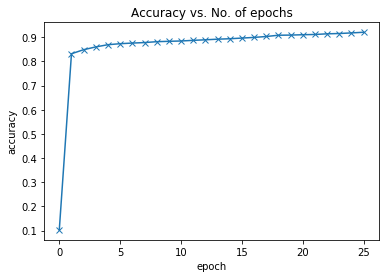

In [77]:
# Replace these values with your results
history = [result0] + history1 + history2 + history3 + history4 + history5
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [46]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


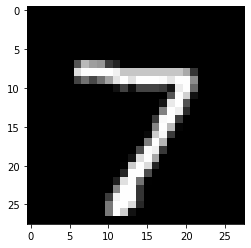

In [53]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('Shape:', img.shape)
print('Label:', label)

In [55]:
img.unsqueeze(0).shape  # this adds the batch to the image

torch.Size([1, 1, 28, 28])

In [56]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


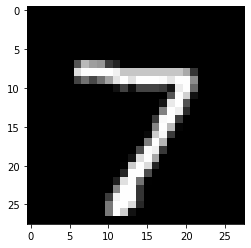

In [57]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


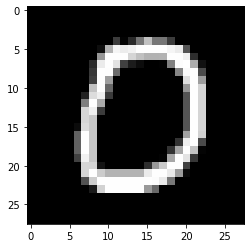

In [58]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 3


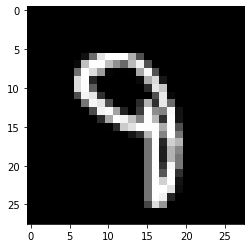

In [59]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


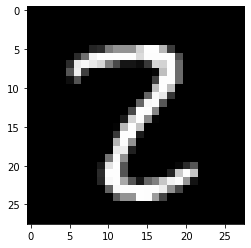

In [60]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [61]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5876168012619019, 'val_acc': 0.865039050579071}

In [62]:
# save model with weights and bias
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [63]:
# this contains the weights and the bias in dictionary form 
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0155,  0.0350, -0.0054,  ..., -0.0024, -0.0224, -0.0020],
                      [-0.0008, -0.0024, -0.0355,  ...,  0.0238,  0.0156, -0.0295],
                      [ 0.0349, -0.0072,  0.0271,  ..., -0.0044,  0.0335,  0.0240],
                      ...,
                      [ 0.0179, -0.0117,  0.0319,  ...,  0.0219, -0.0259, -0.0133],
                      [-0.0269,  0.0302,  0.0277,  ...,  0.0042, -0.0324, -0.0052],
                      [-0.0285,  0.0289,  0.0240,  ...,  0.0083,  0.0167,  0.0094]])),
             ('linear.bias',
              tensor([-4.0805e-02,  8.6268e-02, -6.0790e-02, -2.3164e-02,  3.9968e-02,
                       6.4465e-02, -9.9512e-05,  4.0870e-02, -9.2616e-02,  9.0043e-04]))])

In [65]:
# load model with weights and bias
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0155,  0.0350, -0.0054,  ..., -0.0024, -0.0224, -0.0020],
                      [-0.0008, -0.0024, -0.0355,  ...,  0.0238,  0.0156, -0.0295],
                      [ 0.0349, -0.0072,  0.0271,  ..., -0.0044,  0.0335,  0.0240],
                      ...,
                      [ 0.0179, -0.0117,  0.0319,  ...,  0.0219, -0.0259, -0.0133],
                      [-0.0269,  0.0302,  0.0277,  ...,  0.0042, -0.0324, -0.0052],
                      [-0.0285,  0.0289,  0.0240,  ...,  0.0083,  0.0167,  0.0094]])),
             ('linear.bias',
              tensor([-4.0805e-02,  8.6268e-02, -6.0790e-02, -2.3164e-02,  3.9968e-02,
                       6.4465e-02, -9.9512e-05,  4.0870e-02, -9.2616e-02,  9.0043e-04]))])